# Rest Api

### John Asencio

Then develop a simple Python program that answers these questions:
“Is it raining in Portland, OR?”
“Will it be raining when our class next meets?”

In [8]:
import requests, json
import datetime
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns", None)


#from google.colab import drive
#drive.mount('/content/drive')

#with open('/content/drive/MyDrive/CS 410 Data Engineering/API_Keys/weather_key.txt', 'r') as file:
#    WEATHER_API_KEY = file.read().strip()


WEATHER_API_KEY = '4fb7cb5a6345aab4bfb24bed1898d82a'

def ConvertJSONtoDataFrame(x):
  new_dict = {}
  for key, value in x.items():
      if isinstance(value, list):
          new_dict.update({f'{key}_{i}': v for i, v in enumerate(value)})
      elif isinstance(value, dict):
          new_dict.update({f'{key}_{k}': v for k, v in value.items()})
      else:
          new_dict.update({key: value})
  df = pd.DataFrame.from_dict(new_dict, orient='index').transpose()
  return df


def GetWeatherDataFrame(city_name, call_type="weather"):
  base_url = f"http://api.openweathermap.org/data/2.5/{call_type}?"
  complete_url = base_url + "appid=" + WEATHER_API_KEY + "&q=" + city_name
  response = requests.get(complete_url)
  x = response.json()

  if call_type=="weather":
    return ConvertJSONtoDataFrame(x)

  forecasts = []
  for i in x['list']:
    forecasts.append(ConvertJSONtoDataFrame(i))

  fdf = pd.concat(forecasts).reset_index(drop=True)
  fdf['dt_txt'] = pd.to_datetime(fdf['dt_txt'])
  fdf['date'] = fdf['dt_txt'].dt.date
  fdf['hour_of_day'] = fdf['dt_txt'].dt.hour.astype(int)
  fdf = fdf.rename({'rain_3h':'rain_inches'}, axis=1)

  return fdf


def plot_rain(next_class):
  rain = forecasts[forecasts['date'] == next_class].fillna(0)
  title = f"It's raining on {next_class}!" if any(x > 0.0 for x in rain['rain_inches']) else f"It's not raining on {next_class}!"
  ax = sns.lineplot(data=rain, y="rain_inches", x="hour_of_day")
  ax.set_title(title)
  ax.plot()



## Is it raining in Portland?

In [19]:
today = GetWeatherDataFrame("portland", call_type="weather")
today

,coord_lon,coord_lat,weather_0,base,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,visibility,wind_speed,wind_deg,wind_gust,clouds_all,dt,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
0,-122.6762,45.5234,"{'id': 804, 'main': 'Clouds', 'description': '...",stations,282.28,282.28,280.99,283.49,1011,90,10000,0.45,1,0,100,1712906970,2,2008548,US,1712928554,1712976777,-25200,5746545,Portland,200


API KEY was NOT working when I first did this, took some time to activate

In [20]:
print("It's raining today!" if today.iloc[0]['weather_0']['main'] == 'Rain' else "It's not raining today!")

It's not raining today!


## Will it be raining when our class next meets?

In [17]:
forecasts = GetWeatherDataFrame("portland", call_type="forecast")
forecasts.head()


,dt,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_sea_level,main_grnd_level,main_humidity,main_temp_kf,weather_0,clouds_all,wind_speed,wind_deg,wind_gust,visibility,pop,rain_inches,sys_pod,dt_txt,date,hour_of_day
0,1712912400,282.37,282.37,282.37,282.55,1011,1011,1000,88,-0.18,"{'id': 500, 'main': 'Rain', 'description': 'li...",100,0.79,17,0.83,10000,0.32,0.18,n,2024-04-12 09:00:00,2024-04-12,9
1,1712923200,282.19,282.19,282.15,282.19,1010,1010,999,89,0.04,"{'id': 500, 'main': 'Rain', 'description': 'li...",100,1.08,45,2.24,10000,0.36,0.29,n,2024-04-12 12:00:00,2024-04-12,12
2,1712934000,282.23,281.77,282.23,282.23,1009,1009,999,88,0,"{'id': 804, 'main': 'Clouds', 'description': '...",100,1.48,351,2.55,10000,0,NaN,d,2024-04-12 15:00:00,2024-04-12,15
3,1712944800,286.4,285.43,286.4,286.4,1008,1008,998,63,0,"{'id': 804, 'main': 'Clouds', 'description': '...",100,2.82,352,3.14,10000,0,NaN,d,2024-04-12 18:00:00,2024-04-12,18
4,1712955600,289.84,288.92,289.84,289.84,1007,1007,997,52,0,"{'id': 804, 'main': 'Clouds', 'description': '...",96,3.16,344,3.32,10000,0,NaN,d,2024-04-12 21:00:00,2024-04-12,21


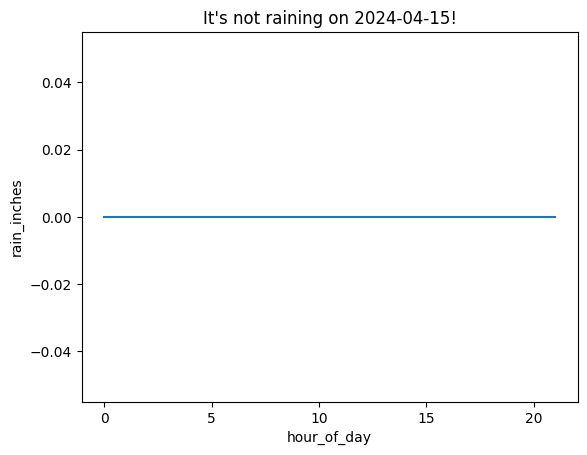

In [21]:
next_class = datetime.date(2024, 4, 15)
plot_rain(next_class)

As you can see it is not raining on the 15. I was not able to make it to class Thursday on the 10th which is why I did it for the 15. \